<a href="https://colab.research.google.com/github/Resia05/unsupervised_learning/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B8%D1%85_%D0%BC%D0%B5%D1%80%D0%B5%D0%B6_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [1]:
import torch
import numpy as np

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
# Перетворення на torch тензори
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Виведення результату
inputs_tensor, targets_tensor

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.]]),
 tensor([[0.],
         [1.],
         [1.],
         [0.],
         [1.]]))

2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [4]:
torch.random.manual_seed(1)

In [21]:
# Ініціалізація ваг w та зміщення b з requires_grad=True
w = torch.randn(inputs.shape[1], 1, requires_grad=True)  # Вектор ваг (3x1)
b = torch.randn(1, requires_grad=True)  # Зсув (скаляр)

# Виведення ініційованих значень
w, b

(tensor([[-1.0276],
         [-0.5631],
         [-0.8923]], requires_grad=True),
 tensor([-0.0583], requires_grad=True))

3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [22]:
# Сигмоїдна функція
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Функція моделі логістичної регресії
def model(x, w, b):
    z = torch.matmul(x, w) + b  # Обчислення лінійної комбінації вхідних даних та ваг
    y_hat = sigmoid(z)  # Застосування сигмоїдної функції
    return y_hat

# Приклад обчислення передбачень
predictions = model(inputs_tensor, w, b)

# Виведення передбачень
predictions

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<MulBackward0>)

Якщо значення ваг
𝑊
та зміщення
𝑏
недостатньо великі (особливо якщо
𝑏
є від'ємним), значення
𝑧
можуть вийти від'ємними або близькими до нуля.  Якщо
𝑧
є від'ємним, ми отримаємо передбачення, що наближаються до 0

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [14]:
import torch

def binary_cross_entropy(predicted_probs, true_labels):
    # Обчислення крос-ентропії для кожного екземпляра
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))
    # Обчислення середнього значення втрат
    mean_loss = torch.mean(loss)
    return mean_loss

# Використовуємо поточні передбачення для обчислення втрат
loss_value = binary_cross_entropy(predictions, targets_tensor)

# Виведення втрат
loss_value


tensor(nan, grad_fn=<MeanBackward0>)

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [15]:
# Обчислення передбачень
predictions = model(inputs_tensor, w, b)

# Обчислення втрат
loss = binary_cross_entropy(predictions, targets_tensor)

# Зворотнє поширення помилки
loss.backward()

# Виведення градієнтів для ваг та зміщення
print(f'Градієнти для ваг (w): {w.grad}')
print(f'Градієнти для зміщення (b): {b.grad}')


Градієнти для ваг (w): tensor([[nan],
        [nan],
        [nan]])
Градієнти для зміщення (b): tensor([nan])


nan ймовірно виникає через 0 у прогнозах. При обчисленнях це призводить до помилок.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [24]:
torch.random.manual_seed(1)
# w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
w = torch.randn(inputs.shape[1], 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

# Виведення ініційованих значень
w, b

(tensor([[6.6135e-04],
         [2.6692e-04],
         [6.1677e-05]], requires_grad=True),
 tensor([0.0006], requires_grad=True))

In [26]:
# Обчислення передбачень з новими вагами та зміщенням
predictions = model(inputs_tensor, w, b)

# Обчислення втрат
loss = binary_cross_entropy(predictions, targets_tensor)

# Зворотне поширення помилки
loss.backward()

# Виведення нових результатів
print("Нове передбачення:", predictions)
print("Нове втрати (Loss):", loss.item())
print("Нові градієнти для ваг (w):", w.grad)
print("Нові градієнти для зміщення (b):", b.grad)

Нове передбачення: tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)
Нове втрати (Loss): 0.6829456686973572
Нові градієнти для ваг (w): tensor([[ -5.4417],
        [-18.9853],
        [-10.0682]])
Нові градієнти для зміщення (b): tensor([-0.0794])


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [29]:
import numpy as np
import torch

# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

# Перетворення на torch тензори
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Ініціалізація ваг та зсуву
torch.random.manual_seed(1)
w = torch.randn(inputs.shape[1], 1, requires_grad=True)  # Вектор ваг (3x1)
b = torch.randn(1, requires_grad=True)  # Зсув (скаляр)

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

# Налаштування гіперпараметрів
learning_rate = 0.01
num_epochs = 1000

# Сигмоїдна функція
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Функція моделі логістичної регресії
def model(x, w, b):
    z = torch.matmul(x, w) + b
    y_hat = sigmoid(z)
    return y_hat

# Функція для обчислення втрат з обмеженнями
def binary_cross_entropy(predicted_probs, true_labels):
    # Обмеження для уникнення log(0)
    predicted_probs = torch.clamp(predicted_probs, 1e-7, 1 - 1e-7)
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))
    mean_loss = torch.mean(loss)
    return mean_loss

# Градієнтний спуск
for epoch in range(num_epochs):
    # Генерація прогнозів
    predictions = model(inputs_tensor, w, b)

    # Обчислення втрат
    loss = binary_cross_entropy(predictions, targets_tensor)

    # Обчислення градієнтів
    loss.backward()

    # Налаштування ваг
    with torch.no_grad():  # Вимкнення відстеження градієнтів для оновлення
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Скидання градієнтів на нуль
    w.grad.zero_()
    b.grad.zero_()

    # Кожні 100 епох виводимо втрати для моніторингу
    if (epoch + 1) % 100 == 0:
        print(f'Епоха {epoch + 1}, Втрати: {loss.item()}')

# Обчислення фінальних передбачень
final_predictions = model(inputs_tensor, w, b)

# Аналіз точності передбачень
final_predictions_binary = (final_predictions > 0.5).float()  # Перетворення ймовірностей в класи

accuracy = (final_predictions_binary.eq(targets_tensor).sum().item()) / targets_tensor.size(0)
print("Фінальні передбачення:", final_predictions_binary)
print("Точність моделі:", accuracy)


Епоха 100, Втрати: 6.376954078674316
Епоха 200, Втрати: 6.376954078674316
Епоха 300, Втрати: 6.376954078674316
Епоха 400, Втрати: 6.376954078674316
Епоха 500, Втрати: 6.376954078674316
Епоха 600, Втрати: 6.376954078674316
Епоха 700, Втрати: 6.376954078674316
Епоха 800, Втрати: 6.376954078674316
Епоха 900, Втрати: 6.376954078674316
Епоха 1000, Втрати: 6.376954078674316
Фінальні передбачення: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Точність моделі: 0.6


Цей код працює невірно, так як втрати не оновлюються. Спроба 2.

In [99]:
import numpy as np
import torch

# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

# Перетворення вхідних даних і цілей у тензори
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

# Гіперпараметри
learning_rate = 1e-5
num_epochs = 1000

# Визначаємо ваги і зсуви
w = torch.randn(1, 3, requires_grad=True)  # Зміна з (2, 3) на (1, 3)
b = torch.randn(1, requires_grad=True)      # Зміна з (2) на (1)

# Визначаємо модель
def model(x, w, b):
    return x @ w.t() + b

# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

# Головна функція тренування
def train(inputs, targets, w, b, learning_rate, num_epochs):
    for epoch in range(num_epochs):
        preds = model(inputs, w, b)
        loss = mse(preds, targets)
        loss.backward()

        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad
            w.grad.zero_()
            b.grad.zero_()

        # Виводимо втрати кожні 100 епох
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Loss = {loss.item()}')

    return preds

# Тренування моделі
final_preds = train(inputs, targets, w, b, learning_rate, num_epochs)

# Виводимо фінальні передбачення та таргети
print("Final Predictions:", final_preds)
print("Targets:", targets)


Epoch 0: Loss = 6522.38720703125
Epoch 100: Loss = 47.66027069091797
Epoch 200: Loss = 26.315210342407227
Epoch 300: Loss = 17.621707916259766
Epoch 400: Loss = 12.107441902160645
Epoch 500: Loss = 8.349320411682129
Epoch 600: Loss = 5.765992164611816
Epoch 700: Loss = 3.988471269607544
Epoch 800: Loss = 2.7652735710144043
Epoch 900: Loss = 1.923520803451538
Final Predictions: tensor([[ 0.3812],
        [ 1.5041],
        [-0.7443],
        [-0.5279],
        [ 2.7391]], grad_fn=<AddBackward0>)
Targets: tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


In [100]:
# Перевірка точності
predicted_classes = (final_preds > 0.5).float()
accuracy = (predicted_classes == targets).float().mean()
print(f'Accuracy: {accuracy.item() * 100:.2f}%')


Accuracy: 80.00%


**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [39]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [82]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [83]:
# Перетворення на torch тензори
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

# Визначаємо dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

# Виведення перших 3 елементів у датасеті
for i in range(3):
    print(f'Елемент {i + 1}: Вхідні дані: {train_ds[i][0]}, Мітка: {train_ds[i][1]}')

Елемент 1: Вхідні дані: tensor([73., 67., 43.]), Мітка: tensor([0.])
Елемент 2: Вхідні дані: tensor([91., 88., 64.]), Мітка: tensor([1.])
Елемент 3: Вхідні дані: tensor([ 87., 134.,  58.]), Мітка: tensor([1.])


8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [84]:
# Визначаємо data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[ 73.,  67.,  43.],
         [102.,  43.,  37.],
         [ 91.,  88.,  64.],
         [ 73.,  67.,  43.],
         [102.,  43.,  37.]]),
 tensor([[0.],
         [0.],
         [1.],
         [0.],
         [0.]])]

9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [85]:
class LogReg(nn.Module):
    def __init__(self, input_dim):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Лінійний шар
        self.sigmoid = nn.Sigmoid()  # Сигмоїдальна активація

    def forward(self, x):
        x = self.linear(x)  # Прямий прохід через лінійний шар
        x = self.sigmoid(x)  # Застосування сигмоїдальної активації
        return x

# Визначаємо модель
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4808,  0.4642,  0.2608],
        [ 0.0806, -0.2977,  0.3369]], requires_grad=True)
Parameter containing:
tensor([ 0.5664, -0.0066], requires_grad=True)


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [87]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

# Визначаємо loss функцію
loss_fn = F.mse_loss

loss = loss_fn(model(inputs), targets)
print(loss)

tensor(4602.0620, grad_fn=<MseLossBackward0>)


<ipython-input-87-935d2e67c9ea>:7: UserWarning: Using a target size (torch.Size([15, 1])) that is different to the input size (torch.Size([15, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(model(inputs), targets)


11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [88]:
# Визначаэмо функцію для навчання моделі
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Створення передбачень
            pred = model(xb)
            loss = loss_fn(pred, yb)

            # Виконання градієнтного спуску
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs), targets))

In [89]:
# Модифікована функцію fit для відстеження втрат
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [90]:
# Train the model for 1000 epochs
loss = fit_return_loss(1000, model, loss_fn, opt, train_dl)

<ipython-input-89-4880dda8734d>:13: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = loss_fn(pred, yb)


Epoch [10/1000], Loss: 21.0467
Epoch [20/1000], Loss: 15.4098
Epoch [30/1000], Loss: 12.4970
Epoch [40/1000], Loss: 10.1592
Epoch [50/1000], Loss: 8.1166
Epoch [60/1000], Loss: 6.9484
Epoch [70/1000], Loss: 6.3935
Epoch [80/1000], Loss: 5.7032
Epoch [90/1000], Loss: 5.0995
Epoch [100/1000], Loss: 4.4380
Epoch [110/1000], Loss: 4.1676
Epoch [120/1000], Loss: 3.8614
Epoch [130/1000], Loss: 3.5972
Epoch [140/1000], Loss: 3.4008
Epoch [150/1000], Loss: 3.1816
Epoch [160/1000], Loss: 3.0234
Epoch [170/1000], Loss: 2.8113
Epoch [180/1000], Loss: 2.7870
Epoch [190/1000], Loss: 2.5188
Epoch [200/1000], Loss: 2.3359
Epoch [210/1000], Loss: 2.2672
Epoch [220/1000], Loss: 2.1703
Epoch [230/1000], Loss: 2.0731
Epoch [240/1000], Loss: 1.9032
Epoch [250/1000], Loss: 1.7538
Epoch [260/1000], Loss: 1.7307
Epoch [270/1000], Loss: 1.5636
Epoch [280/1000], Loss: 1.4682
Epoch [290/1000], Loss: 1.4229
Epoch [300/1000], Loss: 1.3491
Epoch [310/1000], Loss: 1.2999
Epoch [320/1000], Loss: 1.2684
Epoch [330/10

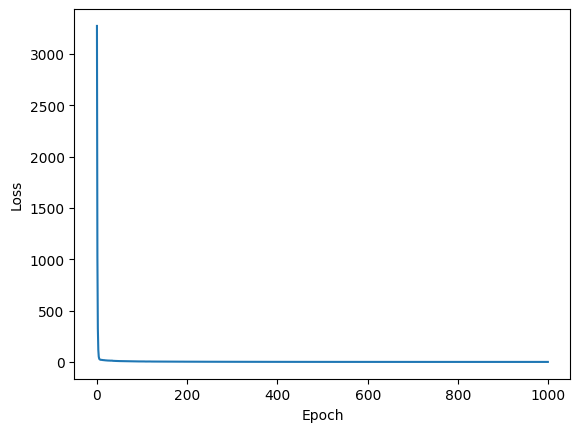

In [91]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [92]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 0.5258,  0.4176],
        [ 0.6520,  0.8902],
        [ 0.9489,  0.6258],
        [-0.0583, -0.1384],
        [ 1.0416,  1.3869],
        [ 0.5258,  0.4176],
        [ 0.6520,  0.8902],
        [ 0.9489,  0.6258],
        [-0.0583, -0.1384],
        [ 1.0416,  1.3869],
        [ 0.5258,  0.4176],
        [ 0.6520,  0.8902],
        [ 0.9489,  0.6258],
        [-0.0583, -0.1384],
        [ 1.0416,  1.3869]], grad_fn=<AddmmBackward0>)

In [80]:
preds.int()

tensor([[0, 0],
        [0, 0],
        [1, 0],
        [0, 0],
        [0, 1],
        [0, 0],
        [0, 0],
        [1, 0],
        [0, 0],
        [0, 1],
        [0, 0],
        [0, 0],
        [1, 0],
        [0, 0],
        [0, 1]], dtype=torch.int32)

In [93]:
# Compare with targets
targets

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])